In [18]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

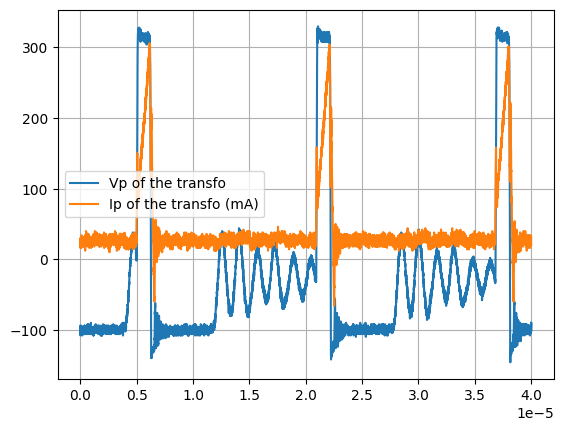

In [19]:
df= pd.read_csv("2025-12-23_08-54-28-772.csv")
Ts = df.Ts .values[0]
Vp = df.CH1.values
Ip = df.CH2.values


time = np.arange(0, len(Vp)*Ts, Ts)
plt.plot(time, Vp, label = "Vp of the transfo")
plt.plot(time, 1000*Ip, label = "Ip of the transfo (mA)")
plt.grid()
plt.legend()

6.17283950617284 MHZ


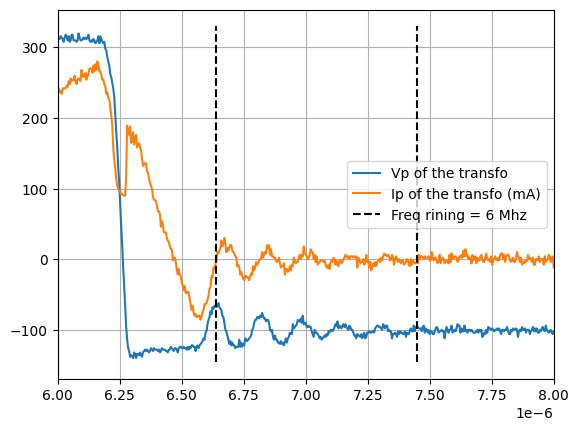

In [20]:
plt.plot(time, Vp, label = "Vp of the transfo")
Ip2= Ip-Ip[:200].mean()
plt.plot(time, 1000*Ip2, label = "Ip of the transfo (mA)")
plt.xlim([0.6e-5,0.8e-5])
x0=6.64e-6
x1=7.45e-6
plt.plot([x0,x0],[Vp.min(), Vp.max()], c="k", linestyle="--")


n=5
fring= n/(x1-x0)
print(fring*1e-6, "MHZ")
plt.plot([x1,x1],[Vp.min(), Vp.max()], c="k", linestyle="--",
         label = f"Freq rining = {fring*1e-6:.0f} Mhz")

plt.grid()
plt.legend()

In [21]:
from math import *
C=2E-12
# Drain capa https://www.datasheet.live/pdfviewer?url=https%3A%2F%2Fpdf.datasheet.live%2F4fdce51b%2Fpowerint.com%2FTNY266PN.pdf
# i must take all parasite capa 
#fring=1/(2*pi*sqrt(LC))
Ls = 1/ ((2*pi)**2*C*fring**2)
print( Ls*1e6, "uH")

332.38414293868897 uH


0.6329113924050632 MHZ


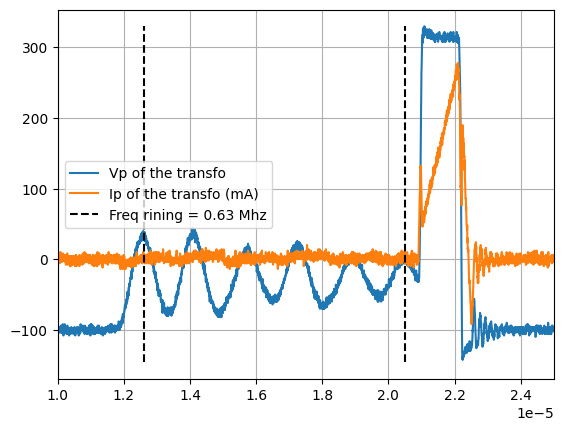

In [22]:
plt.plot(time, Vp, label = "Vp of the transfo")
Ip2= Ip-Ip[:200].mean()
plt.plot(time, 1000*Ip2, label = "Ip of the transfo (mA)")
plt.xlim([1e-5,2.5e-5])
x0=1.26e-5
x1=2.05e-5
plt.plot([x0,x0],[Vp.min(), Vp.max()], c="k", linestyle="--")


n=5
fring= n/(x1-x0)
print(fring*1e-6, "MHZ")
plt.plot([x1,x1],[Vp.min(), Vp.max()], c="k", linestyle="--",
         label = f"Freq rining = {fring*1e-6:.2f} Mhz")

plt.grid()
plt.legend()

In [23]:
from math import *
C=10e-9
#fring=1/(2*pi*sqrt(LC))
Ls = 1/ ((2*pi)**2*C*fring**2)
print( Ls*1e6, "uH")
# 0.63MHz is known as the DCM (Discontinuous Conduction Mode) Ringing.
# 6 Mhz is Leakage Ringing,

6.323455071118301 uH


In [26]:
Lm =1700e-6
Np = 26
Ns=4
Ls = Lm *(Ns/Np)**2
Ls*1e6

40.23668639053255

In [7]:
Lm =1700e-6
Cnode = 1/ ((2*pi)**2*Lm*fring**2)
print("Drain Cnode", Cnode*1e12, "pF")



Fring0 = 6.17283950617284e6 # MHZ turn off
Ls = 1/ ((2*pi)**2*Cnode*Fring0**2)
print("Ls", Ls*1e6, "uH")
print("Leakage", 1e2*Ls/Lm, "%")
# 1% is typical for planner trans

Drain Cnode 37.19679453599001 pF
Ls 17.871655183464185 uH
Leakage 1.0512738343214227 %


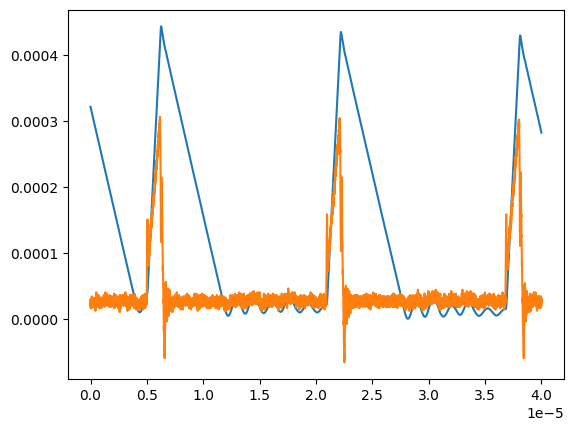

In [8]:
#scipy.integrate.cumtrapz(y, x=None, dx=1.0, axis=-1, initial=None)[source]
import  scipy
integVp = scipy.integrate.cumulative_trapezoid(y= Vp, dx=Ts,initial=0)
a= 26
integVp =integVp +a*time
integVp=integVp-integVp.min()
plt.plot(time, integVp )
plt.plot(time, Ip*1e-3)

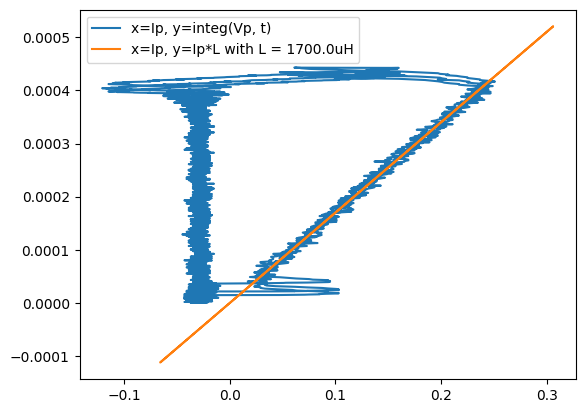

In [9]:
plt.plot(Ip-0.055, integVp,label =  "x=Ip, y=integ(Vp, t)")
L = 1700e-6
# v = L di/dt
# L i = integ(v,t)
plt.plot(Ip, Ip*L,label =  f"x=Ip, y=Ip*L with L = {1e6*L}uH")
plt.legend()

In [10]:
Ls/L

0.010512738343214229

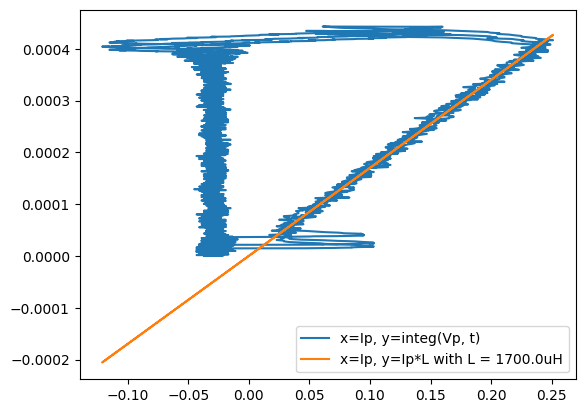

In [11]:
Ip2= Ip-0.055
plt.plot(Ip2 , integVp,label =  "x=Ip, y=integ(Vp, t)")
L = 1700e-6
# v = L di/dt
# L i = integ(v,t)
plt.plot(Ip2, Ip2*L,label =  f"x=Ip, y=Ip*L with L = {1e6*L}uH")
plt.legend()

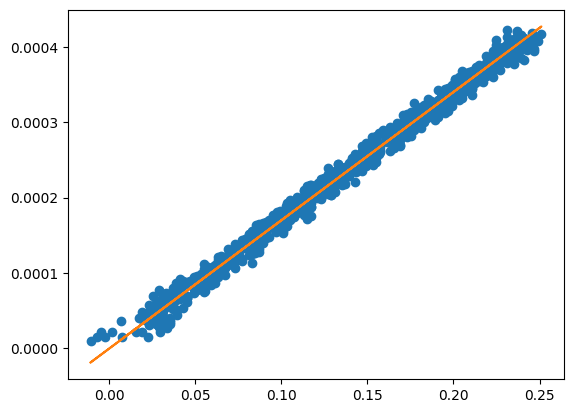

In [12]:
thresh=3e-5
index = [i for i in range(len(integVp)) 
         if np.abs(integVp[i]- (Ip2*L)[i])<thresh]


plt.scatter(Ip2 [index], integVp[index],
            label =  "x=Ip, y=integ(Vp, t)")
plt.plot(Ip2[index], (Ip2*L) [index],
         label =  f"x=Ip, y=Ip*L with L = {1e6*L}uH", c="C1")

In [13]:
5.2*26**2

3515.2000000000003

In [14]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

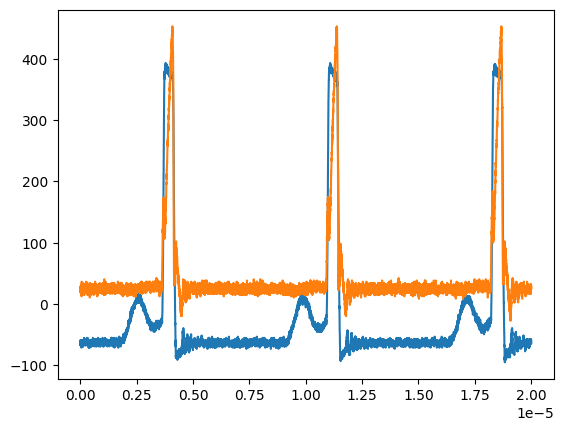

In [15]:
df= pd.read_csv("2025-12-23_08-56-59-168.csv")
Ts = df.Ts .values[0]
Vp = df.CH1.values
Ip = df.CH2.values

time = np.arange(0, len(Vp)*Ts, Ts)
plt.plot(time, Vp)
plt.plot(time, 1000*Ip)


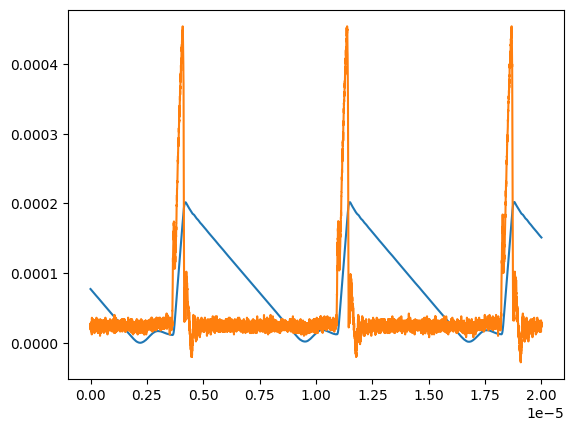

In [16]:
#scipy.integrate.cumtrapz(y, x=None, dx=1.0, axis=-1, initial=None)[source]
import  scipy
integVp = scipy.integrate.cumulative_trapezoid(y= Vp, dx=Ts,initial=0)
a= 26
integVp =integVp +a*time
integVp=integVp-integVp.min()
plt.plot(time, integVp )
plt.plot(time, Ip*1e-3)

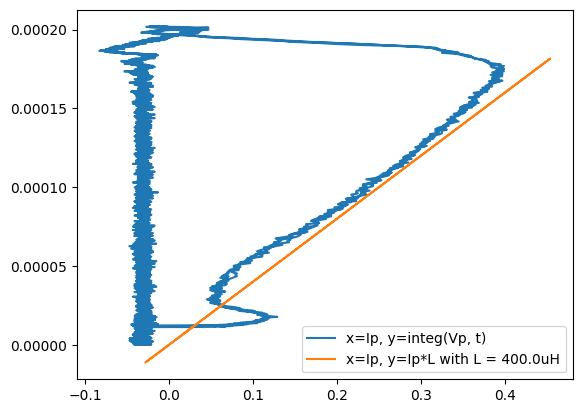

In [17]:
plt.plot(Ip-0.055, integVp,label =  "x=Ip, y=integ(Vp, t)")
L = 400e-6
# v = L di/dt
# L i = integ(v,t)
plt.plot(Ip, Ip*L,label =  f"x=Ip, y=Ip*L with L = {1e6*L}uH")
plt.legend()